# Reproducibility 2: figure 3 & 5 
-  Application harry's data: 
Kemble, Harry, et al. "Flux, toxicity, and expression costs generate complex genetic interactions in a metabolic pathway." Science Advances 6.23 (2020): eabb2236.

In [1]:
import sys 
sys.path.append('../')
from dlim.model import DLIM 
from dlim.dataset import Data_model
from dlim.api import DLIM_API
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score
from numpy import mean
from numpy.random import choice
import pandas as pd
from tqdm import tqdm  
import matplotlib.pyplot as plt 
import numpy as np 

## Prediction accuracy on epistasis data 

In [5]:
df_data = pd.read_csv("../data/data_epis_1.csv", sep = ',', header = None)
data = Data_model(data=df_data, n_variables=2)

all_scores = []
pval_l = []
for i in tqdm(range(10)):
    train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
    val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
    train_data = data.subset(train_id)
    val_data = data.subset(val_id)
    model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 1)
    dlim_regressor = DLIM_API(model=model, flag_spectral=True)
    losses = dlim_regressor.fit(train_data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2)

    fit_v, var, _  = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 
    score, pval = pearsonr(fit_v.flatten(), val_data.data[:, [-1]].flatten())
    all_scores += [score]
    pval_l += [pval]
print(mean(all_scores), all(p < 10**-5 for p in pval_l))

  0%|          | 0/10 [00:00<?, ?it/s]

spectral gap = 0.8974717259407043
spectral gap = 0.6016693711280823


 10%|█         | 1/10 [00:18<02:46, 18.54s/it]

spectral gap = 0.8774338364601135
spectral gap = 0.602717936038971


 20%|██        | 2/10 [00:37<02:28, 18.54s/it]

spectral gap = 0.8711336255073547
spectral gap = 0.6586899161338806


 30%|███       | 3/10 [00:55<02:09, 18.54s/it]

spectral gap = 0.9169238209724426
spectral gap = 0.5767961144447327


 40%|████      | 4/10 [01:14<01:51, 18.54s/it]

spectral gap = 0.9071758389472961
spectral gap = 0.6521344184875488


 50%|█████     | 5/10 [01:32<01:32, 18.54s/it]

spectral gap = 0.8960082530975342
spectral gap = 0.6448369026184082


 60%|██████    | 6/10 [01:51<01:14, 18.54s/it]

spectral gap = 0.8801140785217285
spectral gap = 0.618034839630127


 70%|███████   | 7/10 [02:09<00:55, 18.55s/it]

spectral gap = 0.8538110256195068
spectral gap = 0.6231471300125122


 80%|████████  | 8/10 [02:28<00:37, 18.54s/it]

spectral gap = 0.8858620524406433
spectral gap = 0.7077808976173401


 90%|█████████ | 9/10 [02:49<00:19, 19.37s/it]

spectral gap = 0.8910439014434814
spectral gap = 0.6325762867927551


100%|██████████| 10/10 [03:12<00:00, 19.21s/it]

0.9777237988440592 True


## Get full prediction accuracy on en1

spectral gap = 0.9191145896911621
spectral gap = 0.6179166436195374
Model saved to ./pretrain_models/model_env_1.pth
0.9871322889868327
PearsonRResult(statistic=-0.07018817113059996, pvalue=0.010027469100626818)


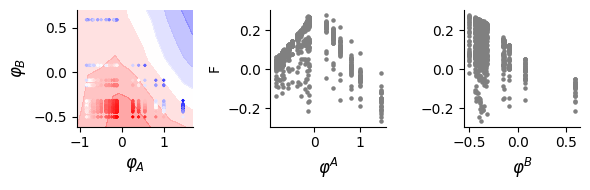

In [2]:
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)
save_path = "./pretrain_models/model_env_1.pth" 


data = Data_model(data=df_data, n_variables=2)

model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0, gap_thres=[0.01, 0.95])
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
losses = dlim_regressor.fit(data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

score = r2_score(fit_a.flatten(), data.data[:, [-1]].flatten())
print(score)

fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^A$", fontsize = 12)
dx.set_xlabel("$\\varphi^B$", fontsize = 12)
plt.tight_layout()
plt.savefig("./img/spec_harry_env_1.png", dpi=300, transparent=False)
plt.show()

## Get full prediction on env2


spectral gap = 0.8362952470779419
spectral gap = 0.996818482875824, so we initialize phenotypes randomly
Model saved to ./pretrain_models/model_env_2.pth
0.9879316558996767
PearsonRResult(statistic=0.224114063625784, pvalue=4.922190063344209e-17)


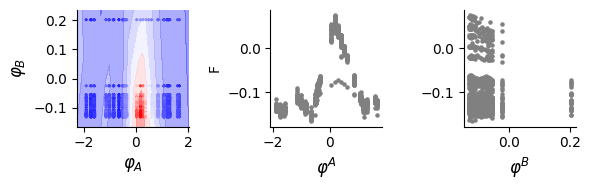

In [7]:
df_data = pd.read_csv("../data/data_env_2.csv", sep = ',', header = None)
save_path = "./pretrain_models/model_env_2.pth" 

data = Data_model(data=df_data, n_variables=2)

model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0, gap_thres=[0.01, 0.95])
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
losses = dlim_regressor.fit(data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

score = r2_score(fit_a.flatten(), data.data[:, [-1]].flatten())
print(score)

fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^A$", fontsize = 12)
dx.set_xlabel("$\\varphi^B$", fontsize = 12)
plt.tight_layout()
plt.savefig("./img/spec_harry_env_2.png", dpi=300, transparent=True)
plt.show()

## Get full prediction accuracy on epistasis

spectral gap = 0.8422809839248657
spectral gap = 0.5362866520881653
Model saved to ./pretrain_models/model_epis_1.pth
0.9594007588135274
PearsonRResult(statistic=-0.13754459236872413, pvalue=1.3778999293159355e-06)


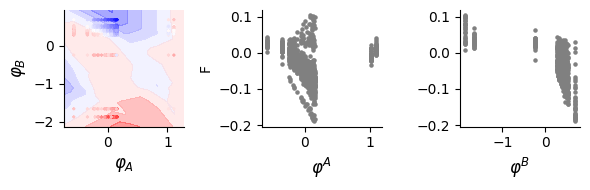

In [2]:
df_data = pd.read_csv("../data/data_epis_1.csv", sep = ',', header = None)
data = Data_model(data=df_data, n_variables=2)
save_path = "./pretrain_models/model_epis_1.pth" 


data = Data_model(data=df_data, n_variables=2)

model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0, gap_thres=[0.01, 0.95])
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
losses = dlim_regressor.fit(data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

score = r2_score(fit_a.flatten(), data.data[:, [-1]].flatten())
print(score)

fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^A$", fontsize = 12)
dx.set_xlabel("$\\varphi^B$", fontsize = 12)
plt.tight_layout()
plt.savefig("./img/spec_harry_epis_1.png", dpi=300, transparent=True)
plt.show()

## Compare dlim model to mechanistic model 

In [6]:
import torch 
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)
data_harry = Data_model(data=df_data, n_variables=2)
act_mut = pd.read_csv("../data/activity_mutation.csv", header=None)
act_dict = {"araA": {}, "araB": {}}
for i, el in act_mut.iterrows():
    gene, mut, act = el
    act_dict[gene][mut] = act
all_mut = [n for n in data_harry.substitutions_tokens[0].keys() if n != "WT"]
araa_m = [act_dict["araA"][n] for n in all_mut]
arab_m = [act_dict["araB"][n] for n in all_mut]

# load model 
model = DLIM(n_variables = data_harry.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True, load_model='./pretrain_models/model_env_1.pth')



### Get simulated data

In [7]:
from src_simulate_data.sim_data import Simulated
# type_f = "tgaus"
type_f = "bio" 
nb_var = 30
data_sim = Simulated(nb_var, type_f, comp=False)
data_bio = Data_model(data=pd.DataFrame(data_sim.data), n_variables=2)
model_save_path = 'pretrain/simulate_' + str(type_f) + '_model.pt'

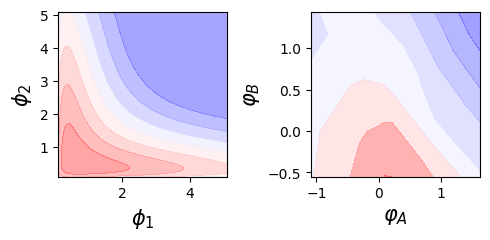

In [8]:
fig, (ax, bx) = plt.subplots(1, 2, figsize=(2.5*2, 2.5))
data_sim.plot(ax, fontsize=15)
dlim_regressor.plot(bx, fontsize=15)
plt.tight_layout()
plt.savefig("./img/fig_4.png", dpi=300, transparent=True)
plt.show()

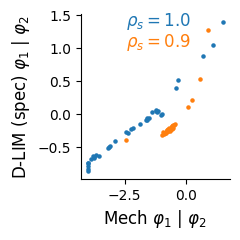

In [9]:
araa_d = [dlim_regressor.model.genes_emb[0][data_harry.substitutions_tokens[0][n]].detach().numpy() for n in all_mut]
arab_d = [dlim_regressor.model.genes_emb[1][data_harry.substitutions_tokens[1][n]].detach().numpy() for n in all_mut]
fig, bx = plt.subplots(ncols=1, figsize=(2.5, 2.5))
score_A = spearmanr(araa_m, araa_d)[0]
score_B = spearmanr(arab_m, arab_d)[0]
bx.set_xlabel("Mech $\\varphi_1$ | $\\varphi_2$", fontsize=12)
bx.set_ylabel("D-LIM (spec) $\\varphi_1$ | $\\varphi_2$", fontsize=12)
bx.annotate(f"$\\rho_s={abs(score_A):.1f}$", xy=(0.3, 0.93), xycoords="axes fraction", fontsize=12, c="C0")
bx.annotate(f"$\\rho_s={abs(score_B):.1f}$", xy=(0.3, 0.8), xycoords="axes fraction", fontsize=12, c="C1")
bx.scatter(np.sign(score_A)*np.array(araa_m), araa_d, c="C0", s=5)
bx.scatter(np.sign(score_B)*np.array(arab_m), arab_d, c="C1", s=5)
for el in ["top", "right"]:
    bx.spines[el].set_visible(False)
plt.tight_layout()